In [1]:
import os
import sys

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib

repo_root = os.path.abspath(os.path.join(os.getcwd(), '..', '..',))
sys.path.append(repo_root)

from src import *

In [2]:

plt.rc('text', usetex=False)
plt.rc('font', size=20, **{'family':'DejaVu Sans','sans-serif':['Helvetica']})
plt.rcParams['xtick.major.pad'] = 8
plt.rcParams['ytick.major.pad'] = 8

In [3]:
process_directory(os.getcwd(), 'ex02.1')
process_directory(os.getcwd(), 'ex02.2')
process_directory(os.getcwd(), 'ex02.3')

In [4]:
def group_results_df(averages_df, compared_col, title):
    means = calculate_column_means_against_base(averages_df, compared_col)
    if title == 'RMS':
        prop = calculate_percentages_against_base(averages_df, compared_col, flipped=True)
    else:
        prop = calculate_percentages_against_base(averages_df, compared_col)

    means.update({'title': title, 'metric': 'mean'})
    prop.update({'title': title, 'metric': 'proportion'})
    
    return means, prop

    
def plot_distributions(ax, df, title, compared_col):
    
    colormap = cm.Accent
    colors = colormap(np.linspace(0, 1, len(df.columns) - 1))

    for i,column in enumerate(df.columns):
        if 'Unnamed' not in column and column != 'rep' and column != 'Game' and column != compared_col:
            ax.hist((df[column] - df[compared_col]), label=column, color=colors[i-1], bins='auto')
            # sns.kdeplot((df[column]-df[compared_col]), ax=ax, label=column, color=colors[i-1])
    
    ax.set_title(f'{title} Distributions')
    ax.set_xlabel('Value')
    ax.set_ylabel('Density')
    




In [5]:
## VISUALIZE ALL METRICS
def visualize_results(base_path, compared_col, binary=False):
    
    # Read the summary CSV files
    log_likelihood_df = pd.read_csv(os.path.join(base_path, 'log_likelihood_summary.csv'))
    leadership_log_likelihood_df = pd.read_csv(os.path.join(base_path, 'leadership_log_likelihood_summary.csv'))
    rms_df = pd.read_csv(os.path.join(base_path, 'rms_summary.csv'))
    rho_df = pd.read_csv(os.path.join(base_path, 'rho_summary.csv'))
    tau_df = pd.read_csv(os.path.join(base_path, 'tau_summary.csv'))

    # List of dataframes and their titles
    dataframes = [
        (log_likelihood_df, 'Log Likelihood'),
        (leadership_log_likelihood_df, 'Leadership Log Likelihood'),
        (rms_df, 'RMS'),
        (rho_df, 'Rho'),
        (tau_df, 'Tau')
    ]

    fig, axes = plt.subplots(1, 5, figsize=(50, 12), sharex=True)
    axes = axes.flatten()


    results = []
    for i, (df, title) in enumerate(dataframes):
        if binary:
            df = df[['Spring_Rank', 'Page_Rank', 'Point_Wise', 'BT']]
        means, prop = group_results_df(df, compared_col, title, binary)
        plot_distributions(axes[i], df, title, compared_col)
        results.extend([means, prop])

    # Convert results to a DataFrame for better visualization
    results_df = pd.DataFrame(results).T
 
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', None)
    pd.set_option('display.max_colwidth', None)
    print(results_df)
        

    plt.tight_layout()
    plt.show()

# Standard 

                          0               1                          2  \
Spring_Rank       -0.104951             0.0                  -0.104951   
Page_Rank         -0.628564             0.0                  -0.628564   
Point_Wise        -0.158818             0.0                  -0.158818   
title        Log Likelihood  Log Likelihood  Leadership Log Likelihood   
metric                 mean      proportion                       mean   

                                     3         4           5  
Spring_Rank                        0.0 -0.025122         0.0  
Page_Rank                          0.0  -1.72314         0.0  
Point_Wise                         0.0 -0.025031         0.0  
title        Leadership Log Likelihood       Rho         Rho  
metric                      proportion      mean  proportion  


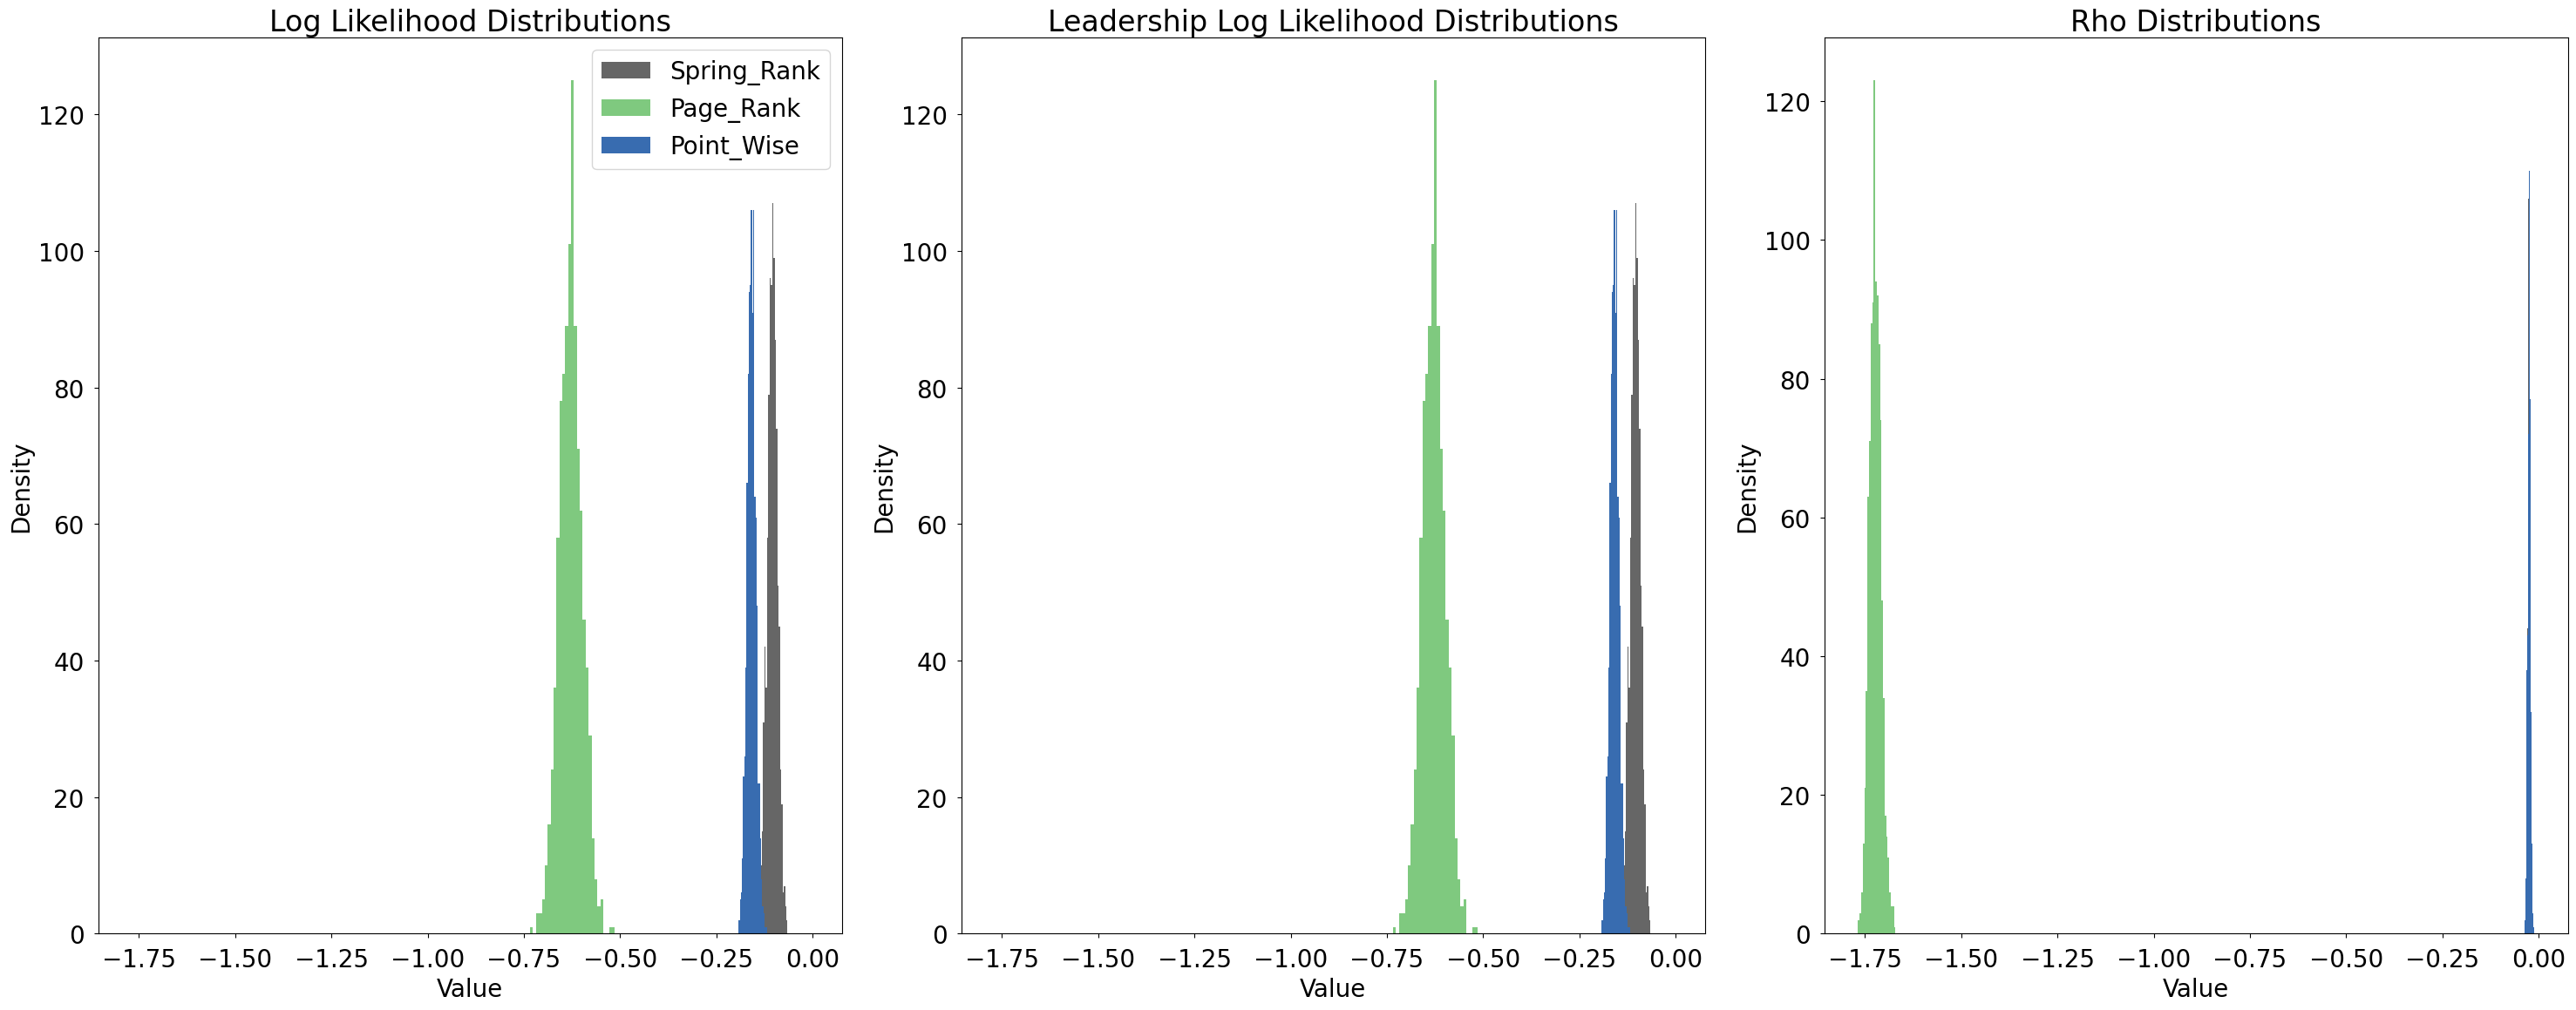

In [6]:
base_path = os.path.join(os.getcwd(), 'results', 'ex02.1')
compared_col = "BT"

log_likelihood_df = pd.read_csv(os.path.join(base_path, 'log_likelihood_summary.csv'))
leadership_log_likelihood_df = pd.read_csv(os.path.join(base_path, 'leadership_log_likelihood_summary.csv'))
rho_df = pd.read_csv(os.path.join(base_path, 'rho_summary.csv'))


# List of dataframes and their titles
dataframes = [
    (log_likelihood_df, 'Log Likelihood'),
    (leadership_log_likelihood_df, 'Leadership Log Likelihood'),
    (rho_df, 'Rho'),  
]

fig, axes = plt.subplots(1, 3, figsize=(30, 12), sharex=True)
axes = axes.flatten()

results = []
for i, (df, title) in enumerate(dataframes):
    df = df[['Spring_Rank', 'Page_Rank', 'Point_Wise', 'BT']]
    means, prop = group_results_df(df, compared_col, title,)
    plot_distributions(axes[i], df, title, compared_col)
    results.extend([means, prop])


axes[0].legend()
# Convert results to a DataFrame for better visualization
results_df = pd.DataFrame(results).T
print(results_df)
# plt.savefig('BT_distributions')
plt.tight_layout()
plt.show()
        


# Higher Order 

\begin{tabular}{lll}
\toprule
 & 0 & 1 \\
\midrule
BT & 0.002000 & 0.000000 \\
BT_leadership & 0.000000 & 0.000000 \\
HOL_BT & 0.000000 & 0.000000 \\
Spring_Rank & 0.000000 & 0.000000 \\
Spring_Rank_Leadership & 0.000000 & 0.000000 \\
Page_Rank & 0.000000 & 0.000000 \\
Page_Rank_Leadership & 0.000000 & 0.000000 \\
Point_Wise & 0.000000 & 0.000000 \\
title & Log Likelihood & Rho \\
metric & proportion & proportion \\
\bottomrule
\end{tabular}



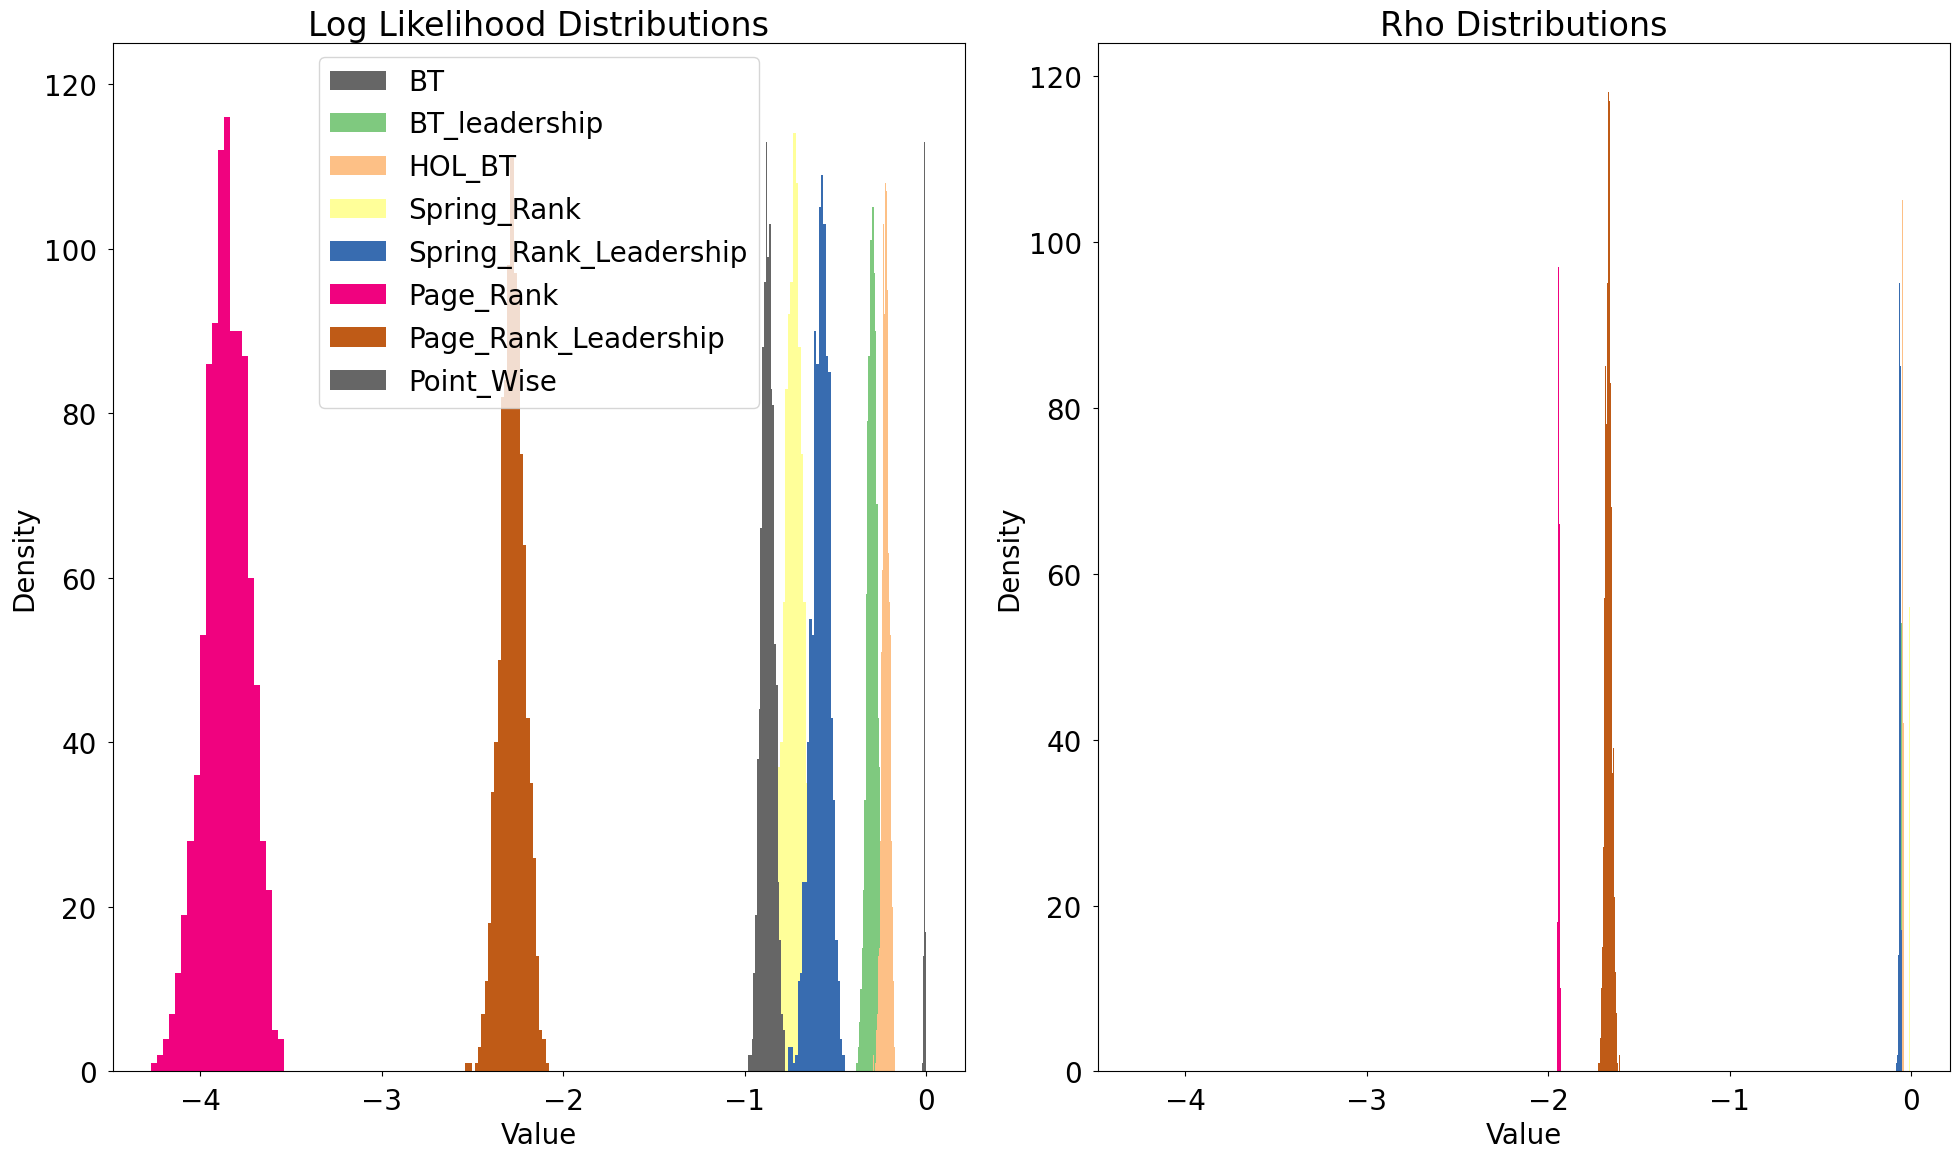

In [7]:
base_path = os.path.join(os.getcwd(), 'results', 'ex02.2')
compared_col = 'HO_BT'

log_likelihood_df = pd.read_csv(os.path.join(base_path, 'log_likelihood_summary.csv'))
rho_df = pd.read_csv(os.path.join(base_path, 'rho_summary.csv'))


# List of dataframes and their titles
dataframes = [
    (log_likelihood_df, 'Log Likelihood'),
    (rho_df, 'Rho'),

]

fig, axes = plt.subplots(1, 2, figsize=(20, 12), sharex=True)
axes = axes.flatten()


results = []
for i, (df, title) in enumerate(dataframes):
    means, prop = group_results_df(df, compared_col, title)
    plot_distributions(axes[i], df, title, compared_col)
    results.append(prop)
# Convert results to a DataFrame for better visualization
results_df = pd.DataFrame(results).T
print(results_df.to_latex())
    
axes[0].legend()
# plt.savefig('HO_distributions')
plt.tight_layout()
plt.show()

# Higher Order Leadership

\begin{tabular}{lll}
\toprule
 & 0 & 1 \\
\midrule
BT & 0.000000 & 0.000000 \\
BT_leadership & 0.005000 & 0.002000 \\
HO_BT & 0.000000 & 0.000000 \\
Spring_Rank & 0.000000 & 0.000000 \\
Spring_Rank_Leadership & 0.000000 & 0.000000 \\
Page_Rank & 0.000000 & 0.000000 \\
Page_Rank_Leadership & 0.000000 & 0.000000 \\
Point_Wise & 0.000000 & 0.000000 \\
title & Leadership Log Likelihood & Rho \\
metric & proportion & proportion \\
\bottomrule
\end{tabular}



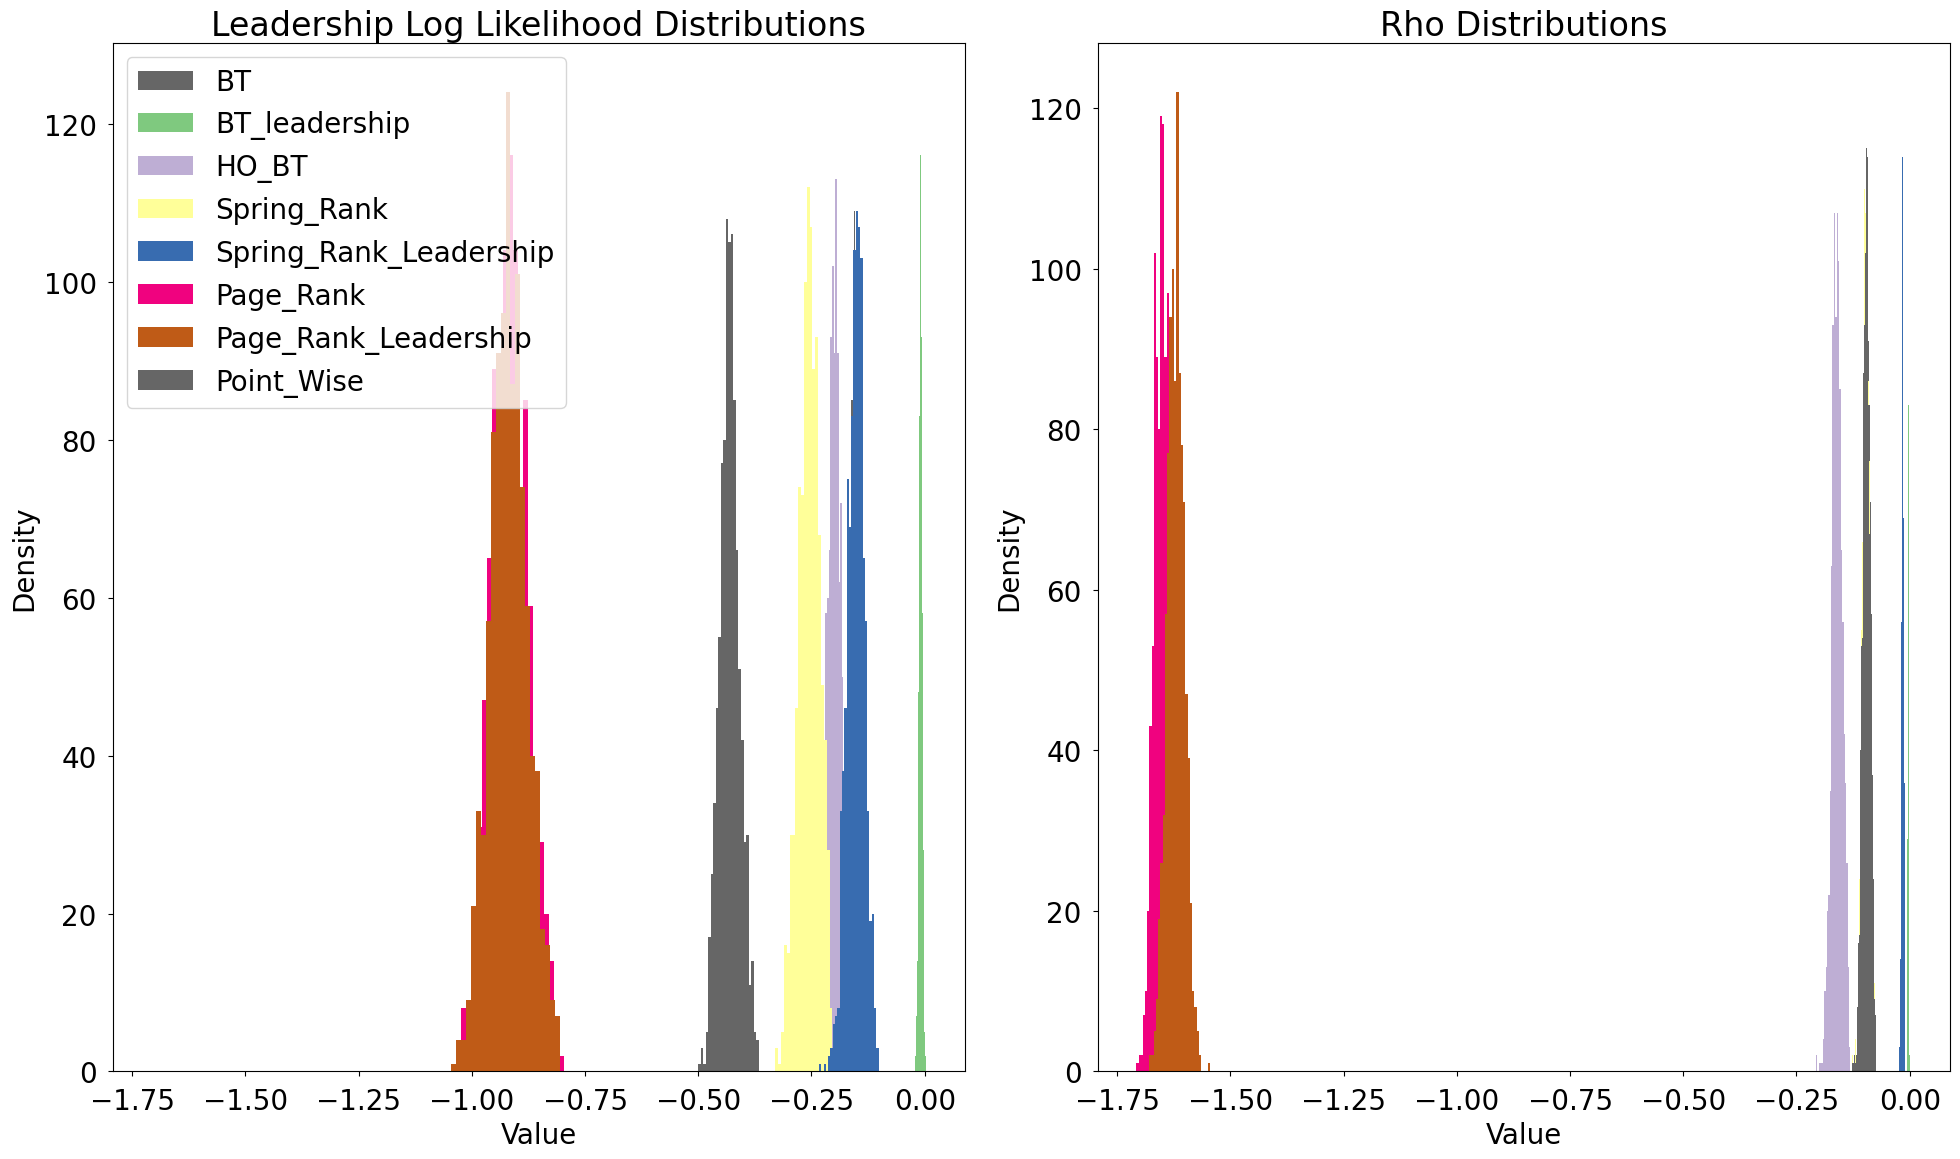

In [8]:
base_path = os.path.join(os.getcwd(), 'results', 'ex02.3')
compared_col='HOL_BT'



leadership_log_likelihood_df = pd.read_csv(os.path.join(base_path, 'leadership_log_likelihood_summary.csv'))
rho_df = pd.read_csv(os.path.join(base_path, 'rho_summary.csv'))


# List of dataframes and their titles
dataframes = [
    (leadership_log_likelihood_df, 'Leadership Log Likelihood'),
    (rho_df, 'Rho'),

]

fig, axes = plt.subplots(1, 2, figsize=(20, 12), sharex=True)
axes = axes.flatten()


results = []
for i, (df, title) in enumerate(dataframes):
    means, prop = group_results_df(df, compared_col, title)
    plot_distributions(axes[i], df, title, compared_col)
    results.append( prop)

# Convert results to a DataFrame for better visualization
results_df = pd.DataFrame(results).T
print(results_df.to_latex())
    
axes[0].legend()
plt.tight_layout()
# plt.savefig('HOL_distributions')
plt.show()